# Install the algorithm and weights


In [ ]:
ALGORITHM = 'yolov7' # set the algorithm, such as 'yolov7'
ALGORITHM_VERSION = 'tiny' # set the algorithm version, such as 'tiny'
WEIGHTS = 'license-plate-detection:experiment-2:best' # set the weights tag, such as 'license-plates:experiment-1:best'

OCR_MODEL_SIZE = 'large' # set the OCR model size, possible values are 'small', 'medium' and 'large'
OCR_MODEL_TYPE = 'printed' # set the OCR model type if using OCR_MODEL_SIZE = 'large', possible values are 'str', 'printed' and 'handwritten'
OCR_MODEL_ACCURACY = 'best' # set the OCR model accuracy if using OCR_MODEL_SIZE = 'large', possible values are 'base', 'medium' and 'best'
OCR_CLASSES = ['license_plate'] # set the class names that the OCR model should read from, such as ['license_plate']

INPUT_IMAGE = 'image.jpg'

## Install the theos python package

In [ ]:
from getpass import getpass
import subprocess

PYTHON_VERSION = 3.8
RegNo=""

def run(command):
  p  = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
  while True:
      output = p.stdout.readline()
      if output == '' and p.poll() is not None:
          break
      if output:
          print(output.strip())

def python(script):
  p = subprocess.Popen(f'python{PYTHON_VERSION} -c "{script}"', shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
  while True:
      output = p.stdout.readline()
      # print("output:",output)
      if output == '' and p.poll() is not None:
          return RegNo
      if output:
          RegNo=output.strip()
          print("output : ",RegNo)

def install_algorithm(algorithm, version, weights):
  run(f'theos install {algorithm} --version {version} --weights {weights}')

INSTALL = f'sudo apt install tesseract-ocr && wget https://bootstrap.pypa.io/get-pip.py && python{PYTHON_VERSION} get-pip.py && python{PYTHON_VERSION} -m pip install --upgrade pip && python{PYTHON_VERSION} -m pip install theos-ai[ocr]==0.0.28'
SETUP = 'theos setup --version v1 --subfield object-detection'
text = ''
SCRIPT = f'''
from theos.computer_vision.object_detection.utils import draw
from theos.computer_vision import ocr
from theos.client import Client
from tqdm import tqdm
import torch
import json
import time
import cv2
import os

if torch.cuda.is_available():
  torch.cuda.empty_cache()

ALGORITHM = '{ALGORITHM}'
ALGORITHM_VERSION = '{ALGORITHM_VERSION}'
WEIGHTS = '{WEIGHTS}'

OCR_MODEL_SIZE = '{OCR_MODEL_SIZE}'
OCR_MODEL_TYPE = '{OCR_MODEL_TYPE}'
OCR_MODEL_ACCURACY = '{OCR_MODEL_ACCURACY}'
OCR_CLASSES = {OCR_CLASSES}

INPUT_IMAGE = '{INPUT_IMAGE}'
client = Client(inputs='.', outputs='.')
yolov7 = client.get(ALGORITHM, version=ALGORITHM_VERSION)
yolov7.load_weights(WEIGHTS)
yolov7.to_gpu()

if OCR_MODEL_TYPE and OCR_MODEL_ACCURACY:
  ocr_model = ocr.load(size=OCR_MODEL_SIZE, model_type=OCR_MODEL_TYPE, accuracy=OCR_MODEL_ACCURACY)
else:
  ocr_model = ocr.load(size=OCR_MODEL_SIZE)

if OCR_MODEL_SIZE == 'large':
  ocr_model.to_gpu()

image = cv2.imread(INPUT_IMAGE)


detections = yolov7.detect(image)
detections = ocr_model.read(image, detections=detections, classes=OCR_CLASSES)
detected_image = draw(image, detections, alpha=0.15)
cv2.imwrite('detected_ocr.jpg', detected_image)
#print(json.dumps(detections, indent=4))
for d in detections:
    text = d['text']
print(text)
'''

## Run the setup to finish installing theos

In [ ]:
run(INSTALL)
run(SETUP)



Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: 

## Log in to account

In [ ]:
!theos login

/bin/bash: line 1: theos: command not found


# Set our theos project


In [ ]:
!theos set-project 252539db-5f84-4228-96cd-bb8fc0af6a76

/bin/bash: line 1: theos: command not found


In [ ]:
install_algorithm(ALGORITHM, ALGORITHM_VERSION, WEIGHTS)

/bin/sh: 1: theos: not found


# Google Sheet id and Worksheet name

In [ ]:
sheet_id = "1BhmkkB7uRV2sRoS7QGmrFqvFocnuF8ZNWHpZlAmuJyc"
worksheet_name1 = "Sheet2"

# Installing dependencies for Google Sheet

In [ ]:
!pip install --upgrade gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 729.9 kB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

# Mount with Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth

# Mount with Google Sheet

In [ ]:
auth.authenticate_user()

In [ ]:
import gspread

In [ ]:
from google.auth import default

In [ ]:
creds, _ = default()

In [ ]:
gc = gspread.authorize(creds)

In [ ]:
sh = gc.open_by_key(sheet_id)

In [ ]:
sh.worksheets()

[<Worksheet 'Sheet1' id:0>,
 <Worksheet 'Sheet2' id:1935890079>,
 <Worksheet 'Sheet3' id:1049364667>]

# Enable webcam and take a picture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='image.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to image.jpg


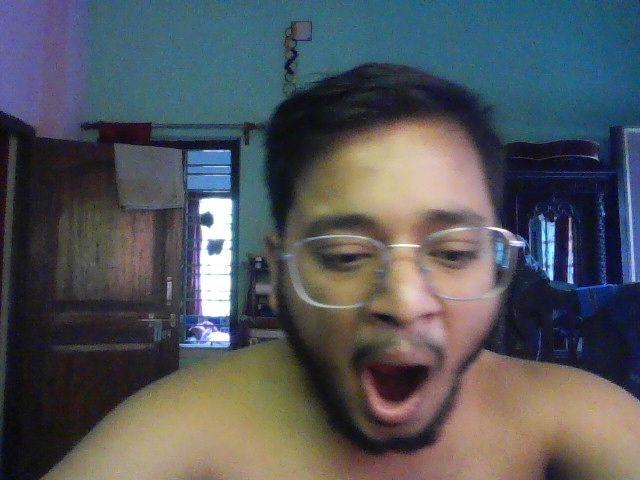

In [22]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Actual detection and convert RC number into String

In [23]:
x=python(SCRIPT)

output :  /bin/sh: 1: python3.8: not found


In [24]:
print(x)

/bin/sh: 1: python3.8: not found


# Replace all unnecessary characters from Reg no

In [25]:
import re

def _replace_(input_str):
    pattern = r'[\s\-.,":~()]+'
    output_str = re.sub(pattern, '', input_str)
    return output_str.upper()

In [26]:
reg = _replace_(x)
reg

'/BIN/SH1PYTHON38NOTFOUND'

# Read and Update Google Sheet

In [27]:
worksheet1 = sh.worksheet(worksheet_name1)

In [28]:
df1 = pd.DataFrame(worksheet1.get_all_records())

In [29]:
df1

,Date,Time,Key,Reg_No
0,4/9/2023,21:25:56,14614420530,DL7CQ1939
1,4/9/2023,21:29:36,21813121252,MH04JM8765
2,4/9/2023,21:34:03,6619913457,TN59AQ1515
3,4/13/2023,11:54:00,8619913457,KA19P8488
4,4/14/2023,21:11:00,876534109,TN21AT0480
5,4/14/2023,21:19:00,83489289,KL63C8800
6,4/14/2023,21:26:00,867238979,RU27TC0530
7,4/14/2023,21:27:00,978289793,KA02MF681
8,4/14/2023,21:53:43,23456546,WB20P7651
9,4/18/2023,14:12:06,146144205305,WB34J9870


In [30]:
worksheet_name2 = "Sheet1"

In [31]:
worksheet2 = sh.worksheet(worksheet_name2)

In [32]:
df2 = pd.DataFrame(worksheet2.get_all_records())

In [ ]:
df2

# If First vehicle is not legitimate

In [ ]:
from IPython.display import Audio
import time

In [ ]:
if df2.empty:
    audio_file = '/content/False.mp3'
    audio = Audio(audio_file, autoplay=True)
    display(audio)
    time.sleep(5)

# Uploading Registration number

In [ ]:
rows_to_update = df2[df2['Reg_No'] == ""]

In [ ]:
for row in rows_to_update.itertuples(index = True, name = 'Pandas'):
  df2.at[row.Index, 'Reg_No'] = reg

In [ ]:
worksheet2.update([df2.columns.values.tolist()] + df2.values.tolist())

# Taking user input for Registration process or Legitimacy check

In [ ]:
print("For Registration press 1.\nFor legitimacy check press 2.")
user_input = int(input("Enter your choice: "))

# Conditions for registration process of vehicle


In [ ]:
if user_input == 1:
  merged_key = pd.merge(df1, df2, on = ['Key'])
  merged_reg = pd.merge(df1, df2, on = ['Reg_No'])

  # **Final legitimacy check**
  if (merged_key.empty and merged_reg.empty):
    print('True\n')
  elif ((not merged_key.empty and merged_reg.empty) or (merged_key.empty and not merged_reg.empty)):
    print('False\n')
  else:
    print('False\n')

  # **True or False Buzzer**
  if (merged_key.empty and merged_reg.empty):
    audio_file = '/content/True.mp3'
    audio = Audio(audio_file, autoplay=True)
    display(audio)
    time.sleep(5)
  elif ((not merged_key.empty and merged_reg.empty) or (merged_key.empty and not merged_reg.empty)):
    audio_file = '/content/False.mp3'
    audio = Audio(audio_file, autoplay=True)
    display(audio)
    time.sleep(5)
  else:
    audio_file = '/content/False.mp3'
    audio = Audio(audio_file, autoplay=True)
    display(audio)
    time.sleep(5)

  # **Uploading legitimate vehicle details into the Dataset**
  from googleapiclient.discovery import build
  from googleapiclient.errors import HttpError

  service = build('sheets', 'v4', credentials=creds)

  spreadsheet_id = '1BhmkkB7uRV2sRoS7QGmrFqvFocnuF8ZNWHpZlAmuJyc'
  source_sheet_name = 'Sheet1'
  destination_sheet_name = 'Sheet2'

  if (merged_key.empty and merged_reg.empty):
    # Get the data from the source sheet
    try:
        result = service.spreadsheets().values().get(
            spreadsheetId=spreadsheet_id,
            range=source_sheet_name
        ).execute()
        source_data = result.get('values', [])
    except HttpError as error:
        print('An error occurred: %s' % error)
        source_data = []

    # Cut the second row from the source data
    if len(source_data) >= 2:
        cut_row = source_data.pop(1)

    # Get the data from the destination sheet
    try:
        result = service.spreadsheets().values().get(
            spreadsheetId=spreadsheet_id,
            range=destination_sheet_name
        ).execute()
        destination_data = result.get('values', [])
    except HttpError as error:
        print('An error occurred: %s' % error)
        destination_data = []

    # Append the cut row to the end of the destination data
    if cut_row and destination_data:
        destination_data.append(cut_row)

    # Write the updated destination data to the destination sheet
    if destination_data:
        try:
            result = service.spreadsheets().values().update(
                spreadsheetId=spreadsheet_id,
                range=destination_sheet_name,
                valueInputOption='USER_ENTERED',
                body={'values': destination_data}
            ).execute()
            print('%d rows updated from %s to %s.' % (
                result.get('updatedRows', 0),
                source_sheet_name,
                destination_sheet_name
            ))
        except HttpError as error:
            print('An error occurred: %s' % error)
    else:
        print('No data found in %s.' % destination_sheet_name)

    worksheet = sh.worksheet(source_sheet_name)
    worksheet.delete_rows(2, 3)

  else:
    worksheet = sh.worksheet(source_sheet_name)
    worksheet.delete_rows(2, 3)

# Conditions for legitimacy check of vehicle

In [ ]:
if user_input == 2:
  merged_df = pd.merge(df1, df2, on = ['Key', 'Reg_No'])

  # **Final legitimacy check**
  if merged_df.empty:
    print('False\n')
  else:
    print('True\n')

  # **True or False Buzzer**
  if merged_df.empty:
    audio_file = '/content/False.mp3'
    audio = Audio(audio_file, autoplay=True)
    display(audio)
    time.sleep(5)
  else:
    audio_file = '/content/True.mp3'
    audio = Audio(audio_file, autoplay=True)
    display(audio)
    time.sleep(5)

  # **Delete the row in Sheet 1 and log that data into another sheet**
  from googleapiclient.discovery import build
  from googleapiclient.errors import HttpError

  service = build('sheets', 'v4', credentials=creds)

  spreadsheet_id = '1BhmkkB7uRV2sRoS7QGmrFqvFocnuF8ZNWHpZlAmuJyc'
  source_sheet_name = 'Sheet1'
  destination_sheet_name = 'Sheet3'

  # Get the data from the source sheet
  try:
      result = service.spreadsheets().values().get(
          spreadsheetId=spreadsheet_id,
          range=source_sheet_name
      ).execute()
      source_data = result.get('values', [])
  except HttpError as error:
      print('An error occurred: %s' % error)
      source_data = []

  # Cut the second row from the source data
  if len(source_data) >= 2:
      cut_row = source_data.pop(1)

  # Get the data from the destination sheet
  try:
      result = service.spreadsheets().values().get(
          spreadsheetId=spreadsheet_id,
          range=destination_sheet_name
      ).execute()
      destination_data = result.get('values', [])
  except HttpError as error:
      print('An error occurred: %s' % error)
      destination_data = []

  # Append the cut row to the end of the destination data
  if cut_row and destination_data:
      destination_data.append(cut_row)

  # Write the updated destination data to the destination sheet
  if destination_data:
      try:
          result = service.spreadsheets().values().update(
              spreadsheetId=spreadsheet_id,
              range=destination_sheet_name,
              valueInputOption='USER_ENTERED',
              body={'values': destination_data}
          ).execute()
          print('%d rows updated from %s to %s.' % (
              result.get('updatedRows', 0),
              source_sheet_name,
              destination_sheet_name
          ))
      except HttpError as error:
          print('An error occurred: %s' % error)
  else:
      print('No data found in %s.' % destination_sheet_name)

  worksheet = sh.worksheet(source_sheet_name)
  worksheet.delete_rows(2, 3)